# Use OSMnx to plot street network over place shape

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Documentation](https://osmnx.readthedocs.io/)
  - [Journal article and citation info](https://geoffboeing.com/publications/osmnx-paper/)
  - [Code repository](https://github.com/gboeing/osmnx)
  - [Examples gallery](https://github.com/gboeing/osmnx-examples)

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox

ox.__version__

'2.0.2'

This example uses Portland, Maine - a city with several islands within its municipal boundaries. Thus, we set `retain_all=True` when getting the network so that we keep all the graph components, not just the largest connected component.

In [ ]:
# get the place boundaries
place = "New York, New York"
gdf = ox.geocoder.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph.graph_from_place(place, network_type="drive", retain_all=True)

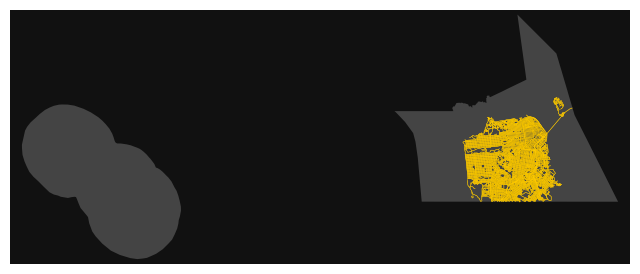

In [10]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#111111",
    edge_color="#ffcb00",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape(s)
gdf.plot(ax=ax, fc="#444444", ec=None, lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.union_all().bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [11]:
digraph = ox.convert.to_digraph(G, weight='length')
digraph.nodes()

NodeView((32927563, 32927591, 32927645, 33241803, 33242031, 54891208, 54891395, 54891397, 54891446, 54891461, 54891483, 54891501, 54891569, 65279851, 65279852, 65279860, 65279862, 65279877, 65279891, 65279893, 65279895, 65279896, 65279897, 65279910, 65279912, 65279914, 65279916, 65279918, 65279929, 65279961, 65279965, 65279971, 65280002, 65280018, 65280040, 65280044, 65280050, 65280069, 65280072, 65280073, 65280076, 65280083, 65280086, 65280094, 65280097, 65280099, 65280104, 65280106, 65280110, 65280114, 65280116, 65280118, 65280134, 65280136, 65280138, 65280154, 65280157, 65280159, 65280184, 65280284, 65280289, 65280292, 65280295, 65280297, 65280302, 65280323, 65280326, 65280347, 65280373, 65280377, 65280380, 65280384, 65280393, 65280398, 65280425, 65280432, 65280438, 65280452, 65280473, 65280488, 65280502, 65280506, 65280576, 65280632, 65280635, 65280672, 65280694, 65280709, 65280738, 65280743, 65280798, 65280835, 65280848, 65280850, 65280896, 65280905, 65281061, 65281097, 65281164, 

Notice this municipal boundary is an administrative boundary, not a physical boundary, so it represents jurisdictional bounds, not individual physical features like islands. To retrieve individual islands' geometries, use the `features` module to search for features matching certain OSM tags:

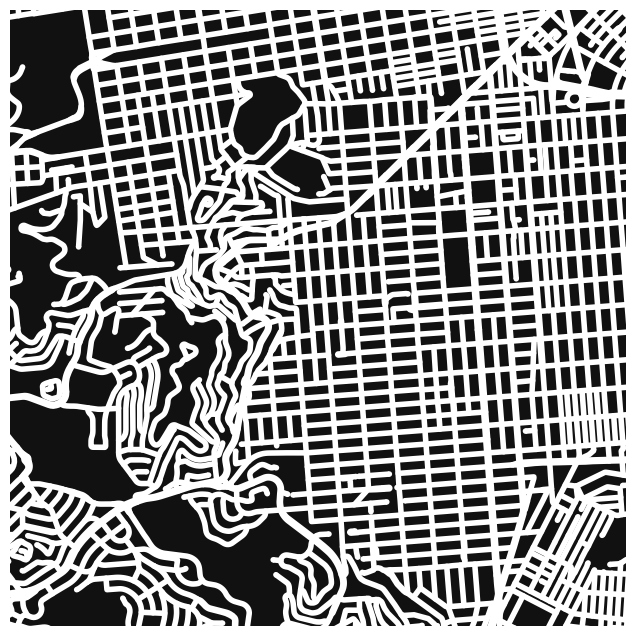

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [12]:
ox.plot.plot_figure_ground(G, dist=2000, street_widths=None, default_width=4, color='w')

In [15]:
ox.stats.basic_stats(G, area=None, clean_int_tol=None)

{'n': 10019,
 'm': 27588,
 'k_avg': 5.507136440762551,
 'edge_length_total': 3128883.6460075276,
 'edge_length_avg': 113.41466021485891,
 'streets_per_node_avg': 3.2997305120271485,
 'streets_per_node_counts': {0: 0,
  1: 861,
  2: 110,
  3: 4470,
  4: 4360,
  5: 181,
  6: 35,
  7: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.08593672023156003,
  2: 0.010979139634694081,
  3: 0.4461523106098413,
  4: 0.43517317097514724,
  5: 0.018065675217087535,
  6: 0.0034933626110390257,
  7: 0.00019962072063080147},
 'intersection_count': 9158,
 'street_length_total': 1870667.31494703,
 'street_segment_count': 16540,
 'street_length_avg': 113.0995958250925,
 'circuity_avg': 1.032828299137516,
 'self_loop_proportion': 0.0013301088270858525}